In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In this exercise, we're going to build a 3-dimensional model of a galaxy, F($\lambda$, x, y) with both a stellar component and a (very simple) active galactic nucleus. To start, let's load in the galaxy spectrum from spectrum.npy and a simple Gaussian representing the [OIII] doublet, which you might see from an active galactic nucleus.

Shape of the Spectrum: (2139,)


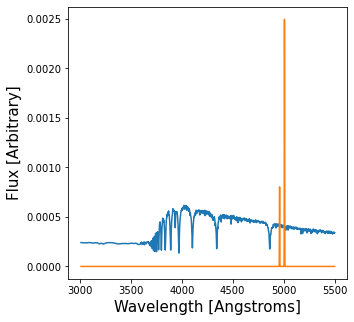

In [2]:
wave, stellar_spec = np.load('spectrum.npy')
wave, agn_spec = np.load('gaussian.npy')

print('Shape of the Spectrum:', np.shape(stellar_spec))

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(wave, stellar_spec)
ax.plot(wave, agn_spec)
ax.set_xlabel('Wavelength [Angstroms]', fontsize=15)
ax.set_ylabel('Flux [Arbitrary]', fontsize=15)
plt.show()

The above cell shows the flux as a function of the wavelength for starlight (blue) and the AGN (orange), but in real galaxies, these won't be coming from the same physical location. In fact, the AGN will be significantly smaller than the galaxy, only emitting at the center. To approximate this, let's imagine that both the galaxy and the AGN are two dimensional Gaussians, with the galaxy being 100 times wider than the AGN.

Shape of the Stellar Profile: (50, 50)


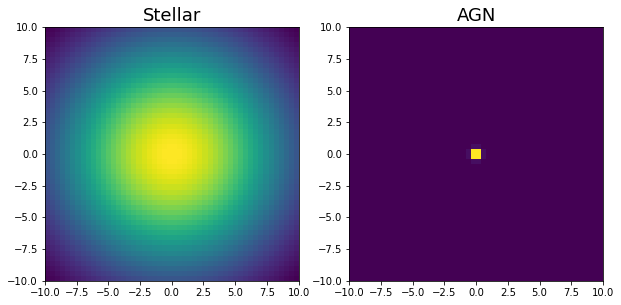

In [3]:
x, y = np.meshgrid(np.linspace(-10, 10, 50), np.linspace(-10,10, 50))
radius = np.sqrt(x**2 + y**2)

sigma_galaxy = 10
sigma_agn = 0.1

stellar_profile = np.exp(-radius**2 / sigma_galaxy**2)
agn_profile = np.exp(-radius**2 / sigma_agn)

print('Shape of the Stellar Profile:', np.shape(stellar_profile))

fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].imshow(stellar_profile, origin='lower', extent=[-10,10, -10, 10])
ax[0].set_title('Stellar', fontsize=18)

ax[1].imshow(agn_profile, origin='lower', extent=[-10,10, -10, 10])
ax[1].set_title('AGN', fontsize=18)
plt.show()

As you can see, we've created a 2D array for both the stellar light and the AGN light, and the AGN light is much more centrally concentrated. Now, we want to add a third dimension for the light as a function of the wavelength, which we can do by creating an array and broadcasting to multiply the new array of ones by the stellar and AGN spectrum. One we have that, let's plot the collapsed cubes by taking the mean along the wavelength direction. Why don't these have any features?

Shape of the new cube: (2139, 50, 50)


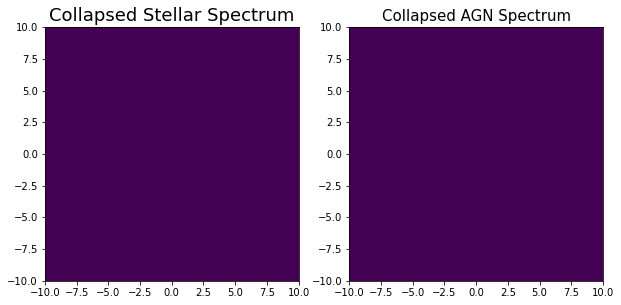

In [4]:
stellar_cube = np.ones((len(stellar_spec),np.shape(stellar_profile)[0], 
                        np.shape(stellar_profile)[1])) * stellar_spec[:,np.newaxis, np.newaxis]

agn_cube = np.ones((len(agn_spec), np.shape(agn_profile)[0], 
                    np.shape(agn_profile)[1])) * agn_spec[:,np.newaxis,np.newaxis]

print('Shape of the new cube:', np.shape(stellar_cube))

fig, ax = plt.subplots(1, 2, figsize=(10,5))

ax[0].imshow(np.mean(stellar_cube, axis=0), extent=[-10,10,-10,10])
ax[0].set_title('Collapsed Stellar Spectrum', fontsize=18)

ax[1].imshow(np.mean(agn_cube, axis=0), extent=[-10,10,-10,10])
ax[1].set_title('Collapsed AGN Spectrum', fontsize=15)

plt.show()

Now that we have 3D cubes with the spectra, it's time to apply the galaxy and AGN profiles. To do this, we're going to multiply the stellar and agn cubes with the two dimensional profiles that represent the shapes. Once we do this, let's take the mean along the wavelength direction again and show the 2D profiles.

Shape of the scaled cube: (2139, 50, 50)


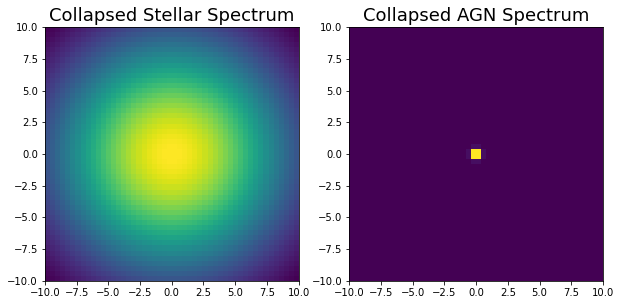

In [5]:
stellar_cube_scaled = stellar_cube * stellar_profile
agn_cube_scaled = agn_cube * agn_profile

print('Shape of the scaled cube:', np.shape(stellar_cube_scaled))

fig, ax = plt.subplots(1, 2, figsize=(10,5))

ax[0].imshow(np.mean(stellar_cube_scaled, axis=0), extent=[-10,10,-10,10])
ax[0].set_title('Collapsed Stellar Spectrum', fontsize=18)

ax[1].imshow(np.mean(agn_cube_scaled, axis=0), extent=[-10,10,-10,10])
ax[1].set_title('Collapsed AGN Spectrum', fontsize=18)
plt.show()

Let's take a look at a few different locations of the galaxy. Plot both the galaxy and AGN flux as a function of wavelength at the location 0,0 (25,25 in pixel coordinates) and -10, -10 (0,0) in pixel coordinates. Try doing this by grabbing the whole slice in the wavelength axis (the 0th axis as we have it set up) and the location we're after in the other two dimensions.

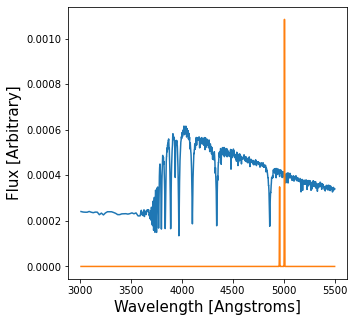

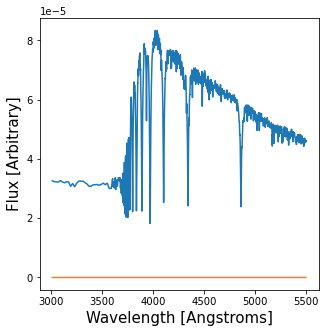

In [7]:
#####YOUR CODE HERE
spectrum_stellar_center = stellar_cube_scaled[:,25,25]
spectrum_agn_center = agn_cube_scaled[:,25,25]

spectrum_stellar_corner = stellar_cube_scaled[:,0,0]
spectrum_agn_corner = agn_cube_scaled[:,0,0]

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(wave, spectrum_stellar_center)
ax.plot(wave, spectrum_agn_center)
ax.set_xlabel('Wavelength [Angstroms]', fontsize=15)
ax.set_ylabel('Flux [Arbitrary]', fontsize=15)
plt.show()

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(wave, spectrum_stellar_corner)
ax.plot(wave, spectrum_agn_corner)
ax.set_xlabel('Wavelength [Angstroms]', fontsize=15)
ax.set_ylabel('Flux [Arbitrary]', fontsize=15)
plt.show()

We now have 3D representations for the wavelength and flux dimensions of the two components of the galaxy. The last thing to do is combine them by adding them together; let's do that in the cell below. Afterwards, let's plot the 2D collapsed mean of our new total galaxy spectrum.

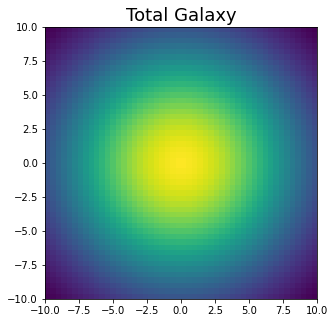

In [8]:
total_galaxy = stellar_cube_scaled + agn_cube_scaled

fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(np.mean(total_galaxy, axis=0), extent=[-10,10,-10,10])
ax.set_title('Total Galaxy', fontsize=18)
plt.show()

That doesn't look very different... but what if we only plot the mean flux between 5005 and 5009 angstroms, where [OIII] is the strongest? Try to do that in the cell below, and then do some other slice further away from that (let's say 5100 angstroms)

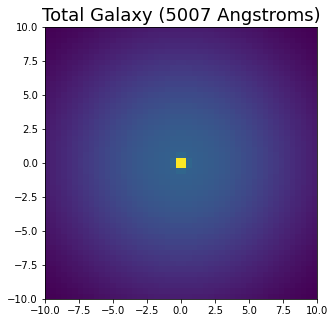

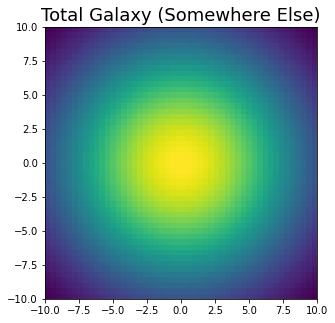

In [9]:
#YOUR CODE HERE
where_agn = np.where((wave>5005) & (wave<5009))

total_galaxy_5007 = total_galaxy[where_agn]

fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(np.mean(total_galaxy_5007, axis=0), extent=[-10,10,-10,10])
ax.set_title('Total Galaxy (5007 Angstroms)', fontsize=18)
plt.show()

#YOUR CODE HERE
where_not_agn = np.where((wave>5100))

total_galaxy_not_AGN = total_galaxy[where_not_agn]


fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(np.mean(total_galaxy_not_AGN, axis=0), extent=[-10,10,-10,10])
ax.set_title('Total Galaxy (Somewhere Else)', fontsize=18)
plt.show()